In [1]:
import requests
import pandas as pd
headers = {
    'user-agent': 'my-app'
}


def main(url):
    with requests.Session() as req:
        req.headers.update(headers)
        allin = []
        for t in ['AMZN', 'GS']:
            params = {
                't': t
            }
            r = req.get(url, params=params)
            df = pd.read_html(r.content, attrs={'id': 'news-table'})[0]
            df[2] = t
            allin.append(df)
        df = pd.concat(allin, ignore_index=True)
        #print(df[2])
        df.to_csv('data.csv', index=False)

main('https://finviz.com/quote.ashx')

In [2]:
df = pd.read_csv('data.csv', usecols=[0,1,2], names=['date_time', 'title','ticker'])
# drop first row
df

,date_time,title,ticker
0,0,1,2
1,Jan-17-23 10:05AM,FAANG Stocks Look Ready to Soar Later This Mon...,AMZN
2,09:31AM,"Zappos, Whole Foods team up on package-free re...",AMZN
3,09:10AM,This Crypto Just Partnered With Amazon. Time t...,AMZN
4,08:46AM,"How the NFL Makes Money: TV, Tickets, and Spon...",AMZN
...,...,...,...
202,04:33AM,Goldman Jolts Traders With Bonus Warning After...,GS
203,Dec-01-22 12:55PM,Mexico Posts $5.35 Billion Record Remittances ...,GS
204,09:25AM,Goldman Sachs (GS) to Pay SEC $4M Penalty Over...,GS
205,Nov-30-22 12:00AM,Goldman makes white-label bet on white-hot ETF...,GS


In [3]:
data=df.reset_index(drop=True) 

In [9]:
data

,date_time,title,ticker
0,0,1,2
1,Jan-17-23 10:05AM,FAANG Stocks Look Ready to Soar Later This Mon...,AMZN
2,09:31AM,"Zappos, Whole Foods team up on package-free re...",AMZN
3,09:10AM,This Crypto Just Partnered With Amazon. Time t...,AMZN
4,08:46AM,"How the NFL Makes Money: TV, Tickets, and Spon...",AMZN
...,...,...,...
202,04:33AM,Goldman Jolts Traders With Bonus Warning After...,GS
203,Dec-01-22 12:55PM,Mexico Posts $5.35 Billion Record Remittances ...,GS
204,09:25AM,Goldman Sachs (GS) to Pay SEC $4M Penalty Over...,GS
205,Nov-30-22 12:00AM,Goldman makes white-label bet on white-hot ETF...,GS


In [10]:
data.iloc[5][2]

'AMZN'

In [13]:
parsed_data = []
for i, row in data.iterrows():
    title = data['title'].iloc[i]
    ticker = data['ticker'].iloc[i]
    date_data = data.iloc[i][0].split(' ')
    if len(date_data) == 2:
        date = date_data[0]
        time = date_data[1]
    else:
        time = date_data[0]
        
    parsed_data.append([time, title, date, ticker])

clean_df = pd.DataFrame(parsed_data, columns=['time', 'title', 'date', 'ticker'])

In [22]:
clean_df

,time,title,date,ticker
0,0,1,09:25AM,2
1,10:05AM,FAANG Stocks Look Ready to Soar Later This Mon...,Jan-17-23,AMZN
2,09:31AM,"Zappos, Whole Foods team up on package-free re...",Jan-17-23,AMZN
3,09:10AM,This Crypto Just Partnered With Amazon. Time t...,Jan-17-23,AMZN
4,08:46AM,"How the NFL Makes Money: TV, Tickets, and Spon...",Jan-17-23,AMZN
...,...,...,...,...
202,04:33AM,Goldman Jolts Traders With Bonus Warning After...,Dec-02-22,GS
203,12:55PM,Mexico Posts $5.35 Billion Record Remittances ...,Dec-01-22,GS
204,09:25AM,Goldman Sachs (GS) to Pay SEC $4M Penalty Over...,Dec-01-22,GS
205,12:00AM,Goldman makes white-label bet on white-hot ETF...,Nov-30-22,GS


In [25]:
clean_df.to_csv('clean_data.csv', index=False) #didn't remake csv
data=pd.read_csv('clean_data.csv')

In [32]:
data #not sure why title and ticker changed
data.drop(index=data.index[0], axis=0, inplace=True)

In [33]:
# """apply sentiment analysis"""
from nltk.sentiment.vader import SentimentIntensityAnalyzer

vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']
data['compound'] = data['title'].apply(f)
data['date'] = pd.to_datetime(data['date'])


In [36]:
data

,time,title,date,ticker,compound
1,10:05AM,FAANG Stocks Look Ready to Soar Later This Mon...,2023-01-17,AMZN,-0.1027
2,09:31AM,"Zappos, Whole Foods team up on package-free re...",2023-01-17,AMZN,0.0000
3,09:10AM,This Crypto Just Partnered With Amazon. Time t...,2023-01-17,AMZN,-0.2960
4,08:46AM,"How the NFL Makes Money: TV, Tickets, and Spon...",2023-01-17,AMZN,0.0000
5,07:54AM,Is Amazon a Good Buy for 2023? Motley Fool,2023-01-17,AMZN,0.1779
...,...,...,...,...,...
202,04:33AM,Goldman Jolts Traders With Bonus Warning After...,2022-12-02,GS,0.2732
203,12:55PM,Mexico Posts $5.35 Billion Record Remittances ...,2022-12-01,GS,0.0000
204,09:25AM,Goldman Sachs (GS) to Pay SEC $4M Penalty Over...,2022-12-01,GS,-0.5267
205,12:00AM,Goldman makes white-label bet on white-hot ETF...,2022-11-30,GS,0.0000


<Figure size 10000x8000 with 0 Axes>

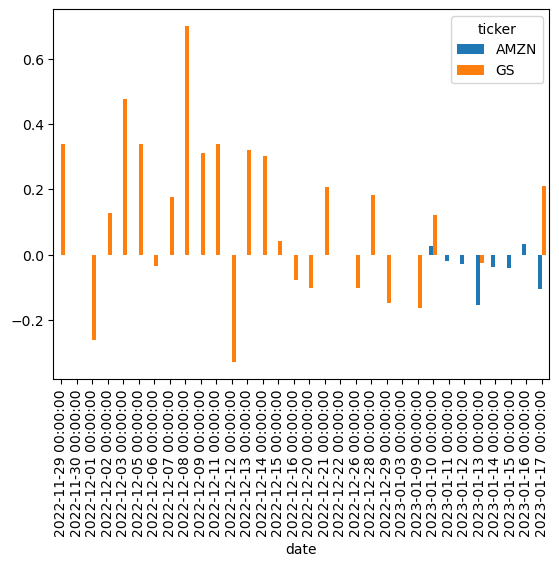

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(100,80))
mean_df = data.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns").transpose()
mean_df.plot(kind='bar')
plt.show()